# Kernel Regression

In [1]:
import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns #sets up styles and gives us more plotting options

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
df = pd.read_csv('../data/processed/rollingsales_manhattan_clean.csv')
df = df.drop('Unnamed: 0',axis=1)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df['GROSS SQUARE FEET'], df['SALE PRICE'], test_size=0.20, random_state=0)

X_test.shape

(327,)

In [4]:
# kernel => weighting function to smooth out discontinuities.
# Accepts an array of distances and return an array of the same shape containing weights.

#np.seterr(divide='ignore', invalid='ignore')
pi = np.pi

def gaussian_kernel(distances):
    weights = []
    for neighborhood in distances:
        nw = []
        for dist in neighborhood:
            nw.append((1/np.sqrt(2*pi))*np.exp(-0.5*((dist/300)**2)))
        weights.append(nw)

    return weights

def epanechnikov_kernel(distances):         
    weights = []
    for neighborhood in distances:
        nw = []
        for dist in neighborhood:
            if np.abs(dist/1000) <= 1:
                nw.append((3/4)*(1-(dist/1000)**2))
            else:
                nw.append(0)
        weights.append(nw)

    return weights

def logistic_kernel(distances):
    weights = []
    for i in range(len(distances)):
        dist = distances[i]
        weights.append(1/(np.exp(dist)+2+np.exp(-dist)))

    return weights

/Users/unchitta/anaconda/lib/python3.6/site-packages/sklearn/neighbors/regression.py:160: RuntimeWarning: invalid value encountered in true_divide
  y_pred[:, j] = num / denom


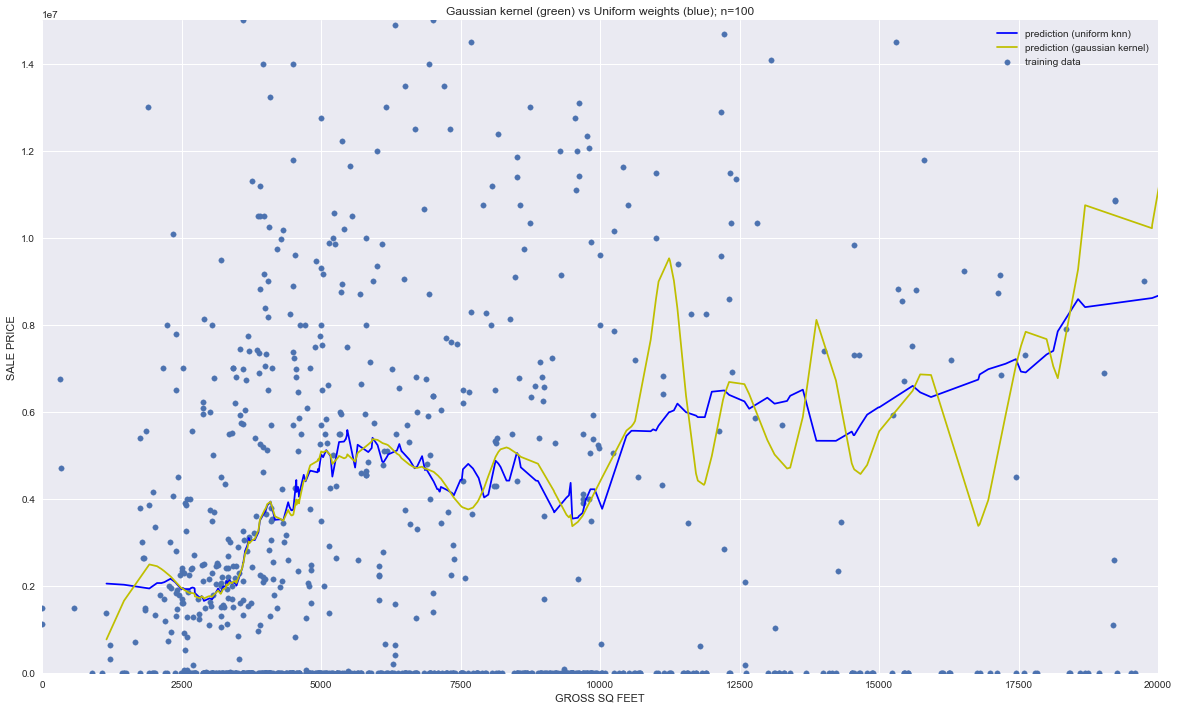

In [5]:
from sklearn.neighbors import KNeighborsRegressor

T = sorted(X_test.values.reshape(-1,1))

knn = KNeighborsRegressor(n_neighbors=100, weights=gaussian_kernel)
knn.fit(X_train.values.reshape(-1,1), y_train)
y_preds = knn.predict(T)

knn2 = KNeighborsRegressor(n_neighbors=100, weights='uniform')
knn2.fit(X_train.values.reshape(-1,1), y_train)
y_preds_uniform = knn2.predict(T)

plt.figure(figsize=(20, 12))
plt.ylim([0,15000000])
plt.xlim([0,20000])
#plt.scatter(T,y_preds, label='testing data', marker='.', c='r',s=30)
plt.scatter(X_train,y_train, label='training data', s=30)
plt.plot(T,y_preds_uniform, label='prediction (uniform knn)', c='b')
plt.plot(T,y_preds, label='prediction (gaussian kernel)', c='y')
plt.xlabel('GROSS SQ FEET')
plt.ylabel('SALE PRICE')
plt.title('Gaussian kernel (green) vs Uniform weights (blue); n=100')
plt.legend()

plt.show()


### What happens when sale price > 0

In [6]:
df2 = df[df['SALE PRICE'] > 0]

In [7]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    df2['GROSS SQUARE FEET'], df2['SALE PRICE'], test_size=0.20, random_state=0)

X_test2.shape

(185,)

/Users/unchitta/anaconda/lib/python3.6/site-packages/sklearn/neighbors/regression.py:160: RuntimeWarning: invalid value encountered in true_divide
  y_pred[:, j] = num / denom


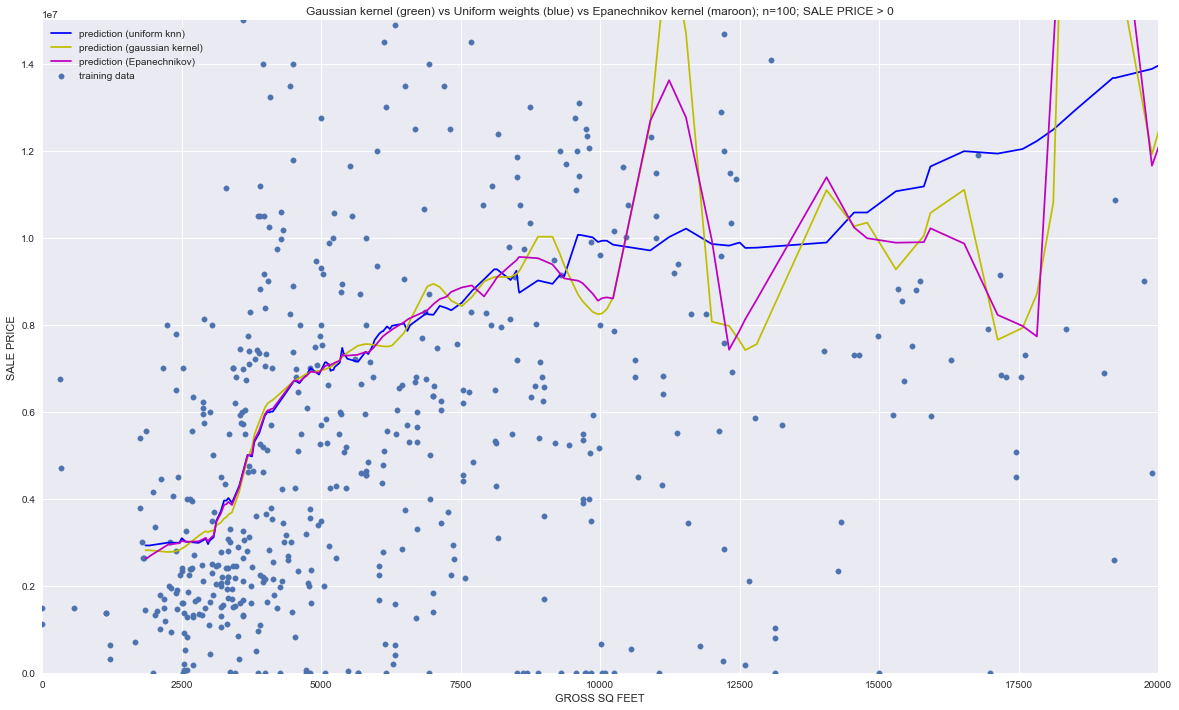

In [8]:
T2 = sorted(X_test2.values.reshape(-1,1))

knn3 = KNeighborsRegressor(n_neighbors=100, weights=epanechnikov_kernel)

knn.fit(X_train2.values.reshape(-1,1), y_train2)
y_preds2 = knn.predict(T2)

knn2.fit(X_train2.values.reshape(-1,1), y_train2)
y_preds_uniform2 = knn2.predict(T2)

knn3.fit(X_train2.values.reshape(-1,1), y_train2)
y_preds_epa2 = knn3.predict(T2)

plt.figure(figsize=(20, 12))
plt.ylim([0,15000000])
plt.xlim([0,20000])
#plt.scatter(T,y_preds, label='testing data', marker='.', c='r',s=30)
plt.scatter(X_train2,y_train2, label='training data', s=30)
plt.plot(T2,y_preds_uniform2, label='prediction (uniform knn)', c='b')
plt.plot(T2,y_preds2, label='prediction (gaussian kernel)', c='y')
plt.plot(T2,y_preds_epa2, label='prediction (Epanechnikov)', c='m')

plt.xlabel('GROSS SQ FEET')
plt.ylabel('SALE PRICE')
plt.title('Gaussian kernel (green) vs Uniform weights (blue) vs Epanechnikov kernel (maroon); n=100; SALE PRICE > 0')
plt.legend()

plt.show()

/Users/unchitta/anaconda/lib/python3.6/site-packages/sklearn/neighbors/regression.py:160: RuntimeWarning: invalid value encountered in true_divide
  y_pred[:, j] = num / denom


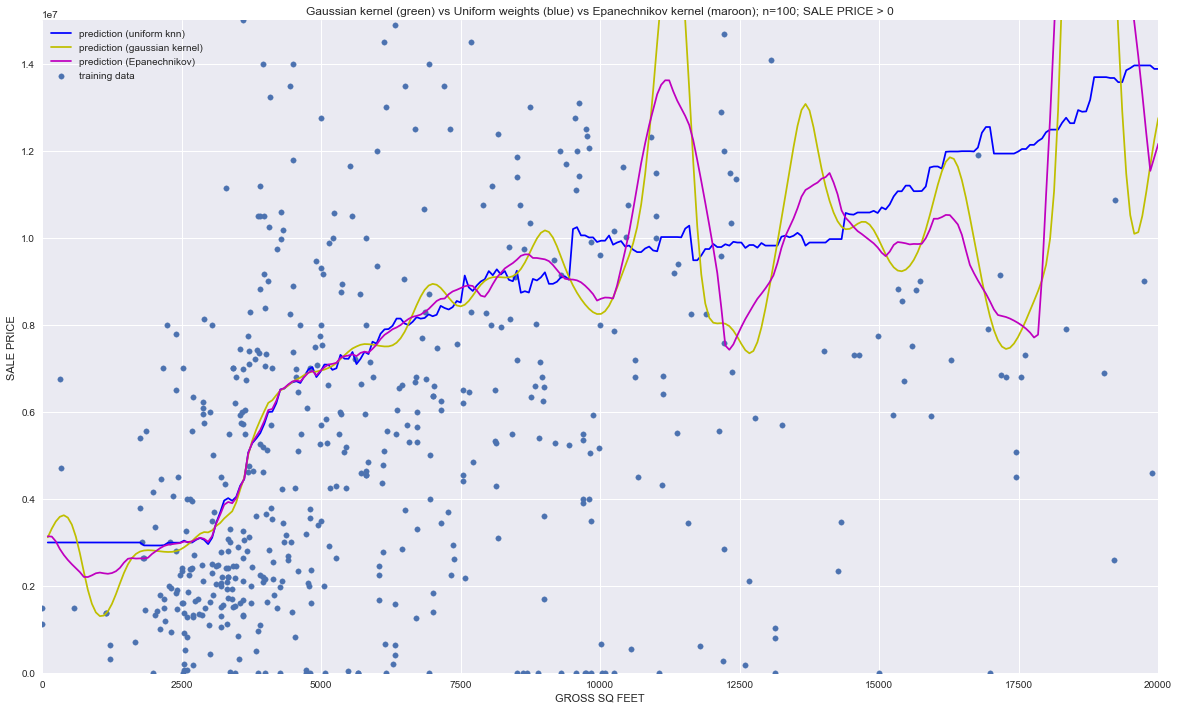

In [9]:
T3 = np.linspace(100,df['GROSS SQUARE FEET'].max(),30000).reshape(-1,1)

y_preds3 = knn.predict(T3)
y_preds_uniform3 = knn2.predict(T3)
y_preds_epa3 = knn3.predict(T3)

plt.figure(figsize=(20, 12))
plt.ylim([0,15000000])
plt.xlim([0,20000])
#plt.scatter(T,y_preds, label='testing data', marker='.', c='r',s=30)
plt.scatter(X_train2,y_train2, label='training data', s=30)
plt.plot(T3,y_preds_uniform3, label='prediction (uniform knn)', c='b')
plt.plot(T3,y_preds3, label='prediction (gaussian kernel)', c='y')
plt.plot(T3,y_preds_epa3, label='prediction (Epanechnikov)', c='m')

plt.xlabel('GROSS SQ FEET')
plt.ylabel('SALE PRICE')
plt.title('Gaussian kernel (green) vs Uniform weights (blue) vs Epanechnikov kernel (maroon); n=100; SALE PRICE > 0')
plt.legend()

plt.show()

## Parameter Tuning & Cross Validation

To evaluate our prediction model, we can’t just test it on the same data on which the model learned as that would just result in repeated labels of the samples the model have learned and a perfect score (i.e., useless model when it comes to unseen data). 

This is called overfitting. Underfittng would be when the model is not complex enough to capture the real pattern (e.g. trying to fit a linear model on a scattered dataset with no clear linear trend). One way to test whether a model is overfitted or under fitted is to use the Bias-Variance tradeoff approach.

One way to test the model is to split the data set into 3 subsets: training sets, testing set, and evaluation set (to evaluate after we tweak the parameters of the model to improve it after running it on the testing set). But this would lead to having significantly less data for the model to learn on.

To solve this problem, we usually turn to K-fold Cross-validation (CV). The general idea behind this is well explained by OpenML:

*In k-fold cross-validation, the original sample is randomly partitioned into k equal size subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k-1 subsamples are used as training data. The cross-validation process is then repeated k times (the folds), with each of the k subsamples used exactly once as the validation data. The k results from the folds can then be averaged (or otherwise combined) to produce a single estimation. The advantage of this method is that all observations are used for both training and validation, and each observation is used for validation exactly once.*

*For classification problems, one typically uses stratified k-fold cross-validation, in which the folds are selected so that each fold contains roughly the same proportions of class labels.*

*In repeated cross-validation, the cross-validation procedure is repeated n times, yielding n random partitions of the original sample. The n results are again averaged (or otherwise combined) to produce a single estimation.*

https://www.openml.org/a/estimation-procedures/1

In [10]:
X_train.shape

(1307,)

In [21]:
# Since we have 1307 training data points, I think it is reasonable to test different numbers of neighbors 
# from 20 to 500, with an increment of 20.

from sklearn.model_selection import KFold, cross_val_score

# create a list of K for K-NN
neighbors = list(range(20,1150,20))

cv_scores1 = []
cv_scores2 = []
cv_scores3 = []
k_fold = KFold(n_splits=10)

for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k)
    #default scoring = given estimator's score() method
    scores1 = cross_val_score(knn, X_train.values.reshape(-1,1), y_train, cv=k_fold, scoring='neg_mean_absolute_error')
    scores2 = cross_val_score(knn, X_train.values.reshape(-1,1), y_train, cv=k_fold, scoring='neg_mean_squared_error')
    scores3 = cross_val_score(knn, X_train.values.reshape(-1,1), y_train, cv=k_fold)
    cv_scores1.append(scores1.mean())
    cv_scores2.append(scores2.mean())
    cv_scores3.append(scores3.mean())


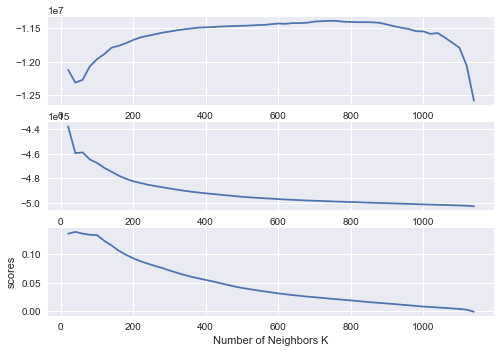

In [34]:
plt.subplot(3, 1, 1)
plt.plot(neighbors, cv_scores1)
plt.subplot(3, 1, 2)
plt.plot(neighbors, cv_scores2)
plt.subplot(3, 1, 3)
plt.plot(neighbors, cv_scores3)
plt.xlabel('Number of Neighbors K')
plt.ylabel('scores')
plt.show()

In [43]:
print("max neg mean abs error" , max(cv_scores1))
print("max neg sq abs error" , max(cv_scores2))
print("max r2 score" , max(cv_scores3))
print("min r2 score" , min(cv_scores3))

optimal_k1 = neighbors[cv_scores1.index(max(cv_scores1))]
print("optimal k, neg mean abs error:",optimal_k1)
optimal_k2 = neighbors[cv_scores2.index(max(cv_scores2))]
print("optimal k, neg mean sq error:",optimal_k2)
optimal_k3 = neighbors[cv_scores3.index(max(cv_scores3))]
print("optimal k, max r2 score:",optimal_k3)
optimal_k4 = neighbors[cv_scores3.index(min(cv_scores3))]
print("optimal k, min r2 score:",optimal_k4)

max neg mean abs error -11391398.4171
max neg sq abs error -4.37800203894e+15
max r2 score 0.139811169294
min r2 score -0.00132848184751
optimal k, neg mean abs error: 740
optimal k, neg mean sq error: 20
optimal k, max r2 score: 40
optimal k, min r2 score: 1140


## Resources & Further Reading

- https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/#exploring-knn-in-code
- http://learning.cis.upenn.edu/cis520_fall2009/index.php?n=Lectures.LocalLearning#toc5
- http://www.bauer.uh.edu/rsusmel/phd/ec1-26.pdf
- http://mccormickml.com/2014/02/26/kernel-regression/
- https://stackoverflow.com/questions/35815992/how-to-find-out-weights-of-attributes-in-k-nearest-neighbors-algorithm
- https://en.wikipedia.org/wiki/Random_forest#Variable_importance
- https://stackoverflow.com/questions/21052509/sklearn-knn-usage-with-a-user-defined-metric?noredirect=1&lq=1
- http://www.statsoft.com/Textbook/k-Nearest-Neighbors#distanceweighting
- https://github.com/jpmml/jpmml-sklearn/issues/42
- http://scikit-learn.org/stable/modules/model_evaluation.html
- http://scikit-learn.org/stable/tutorial/statistical_inference/model_selection.html
- http://scikit-learn.org/stable/modules/cross_validation.html#k-fold
- https://www.openml.org/a/estimation-procedures/1